In [1]:
# Seleccionar un conjunto de datos de algún repositorio público o de alguna fuente propia.
import requests
url="https://raw.githubusercontent.com/crozasc/t2/main/forbes_2022_billionaires.csv"
target_csv_path="forbes_2022_billionaires.csv"

response= requests.get(url)

response.raise_for_status()
with open(target_csv_path,"wb") as f:
    f.write(response.content)
print("CSV descargado correctamente")

CSV descargado correctamente


In [2]:
# Cargar los datos desde la fuente en su respectivo formato a un dataframe.
import pandas as pd

# Utilizar los métodos pandas.read_xxx() y pandas.to_xxx() para leer y guardar los datos.
df = pd.read_csv("forbes_2022_billionaires.csv")
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [3]:
# Revisar si los datos de entrada tienen o no un encabezado. De no ser así, corregir esta situación.
aux = df.columns.tolist()
header = ["rank","personName","age","finalWorth","year","month","category","source","country","state","city","countryOfCitizenship","organization","selfMade","gender","birthDate","title","philanthropyScore","residenceMsa","numberOfSiblings","bio","about"]
if aux!=header:
    df.loc[-1] = aux
    df.index = df.index + 1  
    df = df.sort_index()  
    df.columns = header
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [4]:
# Realizar un análisis básico de los datos de entrada con con los métodos .describe() y .info().
df.describe()

,rank,age,finalWorth,year,month,philanthropyScore,numberOfSiblings
count,2668.000000,2582.000000,2668.000000,2668.0,2668.0,396.000000,127.000000
mean,1302.919040,64.210689,4762.350075,2022.0,4.0,1.856061,2.732283
std,747.807782,13.401258,10540.482258,0.0,0.0,0.971486,1.891706
min,1.000000,19.000000,1000.000000,2022.0,4.0,1.000000,1.000000
25%,665.000000,55.000000,1500.000000,2022.0,4.0,1.000000,2.000000
50%,1292.000000,64.000000,2400.000000,2022.0,4.0,2.000000,2.000000
75%,1929.000000,74.000000,4300.000000,2022.0,4.0,2.000000,3.000000
max,2578.000000,100.000000,219000.000000,2022.0,4.0,5.000000,14.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  2668 non-null   int64  
 1   personName            2668 non-null   object 
 2   age                   2582 non-null   float64
 3   finalWorth            2668 non-null   float64
 4   year                  2668 non-null   int64  
 5   month                 2668 non-null   int64  
 6   category              2668 non-null   object 
 7   source                2668 non-null   object 
 8   country               2655 non-null   object 
 9   state                 748 non-null    object 
 10  city                  2624 non-null   object 
 11  countryOfCitizenship  2668 non-null   object 
 12  organization          352 non-null    object 
 13  selfMade              2668 non-null   bool   
 14  gender                2652 non-null   object 
 15  birthDate            

In [6]:
# Identificar y manipular valores faltantes.
import numpy as np
#a) Identificar valores faltantes.
datos_faltantes = df.isnull()
for columna in datos_faltantes.columns.values.tolist():
    print('columna:',columna)
    print (datos_faltantes[columna].value_counts())
    print("")    

columna: rank
False    2668
Name: rank, dtype: int64

columna: personName
False    2668
Name: personName, dtype: int64

columna: age
False    2582
True       86
Name: age, dtype: int64

columna: finalWorth
False    2668
Name: finalWorth, dtype: int64

columna: year
False    2668
Name: year, dtype: int64

columna: month
False    2668
Name: month, dtype: int64

columna: category
False    2668
Name: category, dtype: int64

columna: source
False    2668
Name: source, dtype: int64

columna: country
False    2655
True       13
Name: country, dtype: int64

columna: state
True     1920
False     748
Name: state, dtype: int64

columna: city
False    2624
True       44
Name: city, dtype: int64

columna: countryOfCitizenship
False    2668
Name: countryOfCitizenship, dtype: int64

columna: organization
True     2316
False     352
Name: organization, dtype: int64

columna: selfMade
False    2668
Name: selfMade, dtype: int64

columna: gender
False    2652
True       16
Name: gender, dtype: int64

co

In [7]:
#Manipular valores faltantes.
#Borramos columnas con información que consideramos poco relevante
df.pop("state")
df.pop("city")
df.pop("countryOfCitizenship")
df.pop("birthDate")
df.pop("philanthropyScore")
df.pop("residenceMsa")
df.pop("about")
df.pop("year")
df.pop("month")
df.head()

,rank,personName,age,finalWorth,category,source,country,organization,selfMade,gender,title,numberOfSiblings,bio
0,1,Elon Musk,50.0,219000.0,Automotive,"Tesla, SpaceX",United States,Tesla,True,M,CEO,NaN,Elon Musk is working to revolutionize transpor...
1,2,Jeff Bezos,58.0,171000.0,Technology,Amazon,United States,Amazon,True,M,Entrepreneur,NaN,Jeff Bezos founded e-commerce giant Amazon in ...
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,LVMH,France,LVMH Moët Hennessy Louis Vuitton,False,M,Chairman and CEO,NaN,Bernard Arnault oversees the LVMH empire of so...
3,4,Bill Gates,66.0,129000.0,Technology,Microsoft,United States,Bill & Melinda Gates Foundation,True,M,Cofounder,NaN,Bill Gates turned his fortune from software fi...
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,Berkshire Hathaway,United States,Berkshire Hathaway,True,M,CEO,NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett..."


In [8]:
#Quitar espacios en Value para usar como int
#En la edad ponemos un promedio a aquellas personas que no sabemos su edad
prom_Value = df['age'].astype('float').mean(axis=0)
prom_Value = int(prom_Value)
df['age'].replace(np.nan, prom_Value, inplace = True)
df['numberOfSiblings'].replace(np.nan, 0, inplace = True)



In [9]:
df.dtypes

rank                  int64
personName           object
age                 float64
finalWorth          float64
category             object
source               object
country              object
organization         object
selfMade               bool
gender               object
title                object
numberOfSiblings    float64
bio                  object
dtype: object

In [10]:
# Corregir el formato de los datos.
df[["age","numberOfSiblings"]] = df[["age","numberOfSiblings"]].astype("int")
df.dtypes

rank                  int64
personName           object
age                   int32
finalWorth          float64
category             object
source               object
country              object
organization         object
selfMade               bool
gender               object
title                object
numberOfSiblings      int32
bio                  object
dtype: object

In [11]:
#Estandarizar datos de entrada.
#Dolar a clp
df['finalWorth'] = df["finalWorth"]*853.51
df.head()

,rank,personName,age,finalWorth,category,source,country,organization,selfMade,gender,title,numberOfSiblings,bio
0,1,Elon Musk,50,186918690.0,Automotive,"Tesla, SpaceX",United States,Tesla,True,M,CEO,0,Elon Musk is working to revolutionize transpor...
1,2,Jeff Bezos,58,145950210.0,Technology,Amazon,United States,Amazon,True,M,Entrepreneur,0,Jeff Bezos founded e-commerce giant Amazon in ...
2,3,Bernard Arnault & family,73,134854580.0,Fashion & Retail,LVMH,France,LVMH Moët Hennessy Louis Vuitton,False,M,Chairman and CEO,0,Bernard Arnault oversees the LVMH empire of so...
3,4,Bill Gates,66,110102790.0,Technology,Microsoft,United States,Bill & Melinda Gates Foundation,True,M,Cofounder,0,Bill Gates turned his fortune from software fi...
4,5,Warren Buffett,91,100714180.0,Finance & Investments,Berkshire Hathaway,United States,Berkshire Hathaway,True,M,CEO,0,"Known as the ""Oracle of Omaha,"" Warren Buffett..."


In [12]:
# Normalizar datos de entrada.
df.loc[df['numberOfSiblings'] <= 1, 'hasSibling'] = 'True' 
df.loc[df['numberOfSiblings'] == 0, 'hasSibling'] = 'False' 
df.pop('numberOfSiblings')
df.head()

,rank,personName,age,finalWorth,category,source,country,organization,selfMade,gender,title,bio,hasSibling
0,1,Elon Musk,50,186918690.0,Automotive,"Tesla, SpaceX",United States,Tesla,True,M,CEO,Elon Musk is working to revolutionize transpor...,False
1,2,Jeff Bezos,58,145950210.0,Technology,Amazon,United States,Amazon,True,M,Entrepreneur,Jeff Bezos founded e-commerce giant Amazon in ...,False
2,3,Bernard Arnault & family,73,134854580.0,Fashion & Retail,LVMH,France,LVMH Moët Hennessy Louis Vuitton,False,M,Chairman and CEO,Bernard Arnault oversees the LVMH empire of so...,False
3,4,Bill Gates,66,110102790.0,Technology,Microsoft,United States,Bill & Melinda Gates Foundation,True,M,Cofounder,Bill Gates turned his fortune from software fi...,False
4,5,Warren Buffett,91,100714180.0,Finance & Investments,Berkshire Hathaway,United States,Berkshire Hathaway,True,M,CEO,"Known as the ""Oracle of Omaha,"" Warren Buffett...",False


Text(0.5, 1.0, 'Dinero por persona')

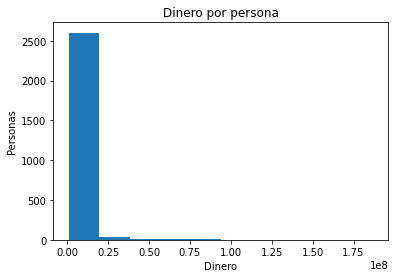

In [13]:
# Agrupar datos de entrada.
%matplotlib inline
import matplotlib as plt
plt.pyplot.hist(df["finalWorth"])
# setear las etiquetas para los ejes x e y más un título
plt.pyplot.xlabel("Dinero")
plt.pyplot.ylabel("Personas")
plt.pyplot.title("Dinero por persona")


Text(0.5, 1.0, 'Dinero por persona')

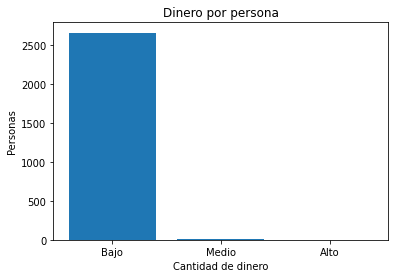

In [14]:
contenedores = np.linspace(min(df["finalWorth"]), max(df["finalWorth"]), 4)
nombres_de_grupo = ['Bajo', 'Medio', 'Alto']
df['Worth-binned'] = pd.cut(df['finalWorth'], contenedores, labels=nombres_de_grupo, include_lowest=True )

plt.pyplot.bar(nombres_de_grupo, df["Worth-binned"].value_counts())
# setear las etiquetas para los ejes x e y más un título
plt.pyplot.xlabel("Cantidad de dinero")
plt.pyplot.ylabel("Personas")
plt.pyplot.title("Dinero por persona")

In [15]:
df.head()

,rank,personName,age,finalWorth,category,source,country,organization,selfMade,gender,title,bio,hasSibling,Worth-binned
0,1,Elon Musk,50,186918690.0,Automotive,"Tesla, SpaceX",United States,Tesla,True,M,CEO,Elon Musk is working to revolutionize transpor...,False,Alto
1,2,Jeff Bezos,58,145950210.0,Technology,Amazon,United States,Amazon,True,M,Entrepreneur,Jeff Bezos founded e-commerce giant Amazon in ...,False,Alto
2,3,Bernard Arnault & family,73,134854580.0,Fashion & Retail,LVMH,France,LVMH Moët Hennessy Louis Vuitton,False,M,Chairman and CEO,Bernard Arnault oversees the LVMH empire of so...,False,Alto
3,4,Bill Gates,66,110102790.0,Technology,Microsoft,United States,Bill & Melinda Gates Foundation,True,M,Cofounder,Bill Gates turned his fortune from software fi...,False,Medio
4,5,Warren Buffett,91,100714180.0,Finance & Investments,Berkshire Hathaway,United States,Berkshire Hathaway,True,M,CEO,"Known as the ""Oracle of Omaha,"" Warren Buffett...",False,Medio


In [16]:
#  Generar variables indicadoras.
variable_dummy_1 = pd.get_dummies(df["gender"])
variable_dummy_1.head()

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [17]:
variable_dummy_1.rename(columns={'M':'Male', 'F':'Female'}, inplace=True)
# combinar los dataframes "df" y "variable_dummy_1" 
df = pd.concat([df, variable_dummy_1], axis=1)

# Elimina la columna original "fuel-type" del dataframe "df"
df.pop("gender")
df.head()

,rank,personName,age,finalWorth,category,source,country,organization,selfMade,title,bio,hasSibling,Worth-binned,Female,Male
0,1,Elon Musk,50,186918690.0,Automotive,"Tesla, SpaceX",United States,Tesla,True,CEO,Elon Musk is working to revolutionize transpor...,False,Alto,0,1
1,2,Jeff Bezos,58,145950210.0,Technology,Amazon,United States,Amazon,True,Entrepreneur,Jeff Bezos founded e-commerce giant Amazon in ...,False,Alto,0,1
2,3,Bernard Arnault & family,73,134854580.0,Fashion & Retail,LVMH,France,LVMH Moët Hennessy Louis Vuitton,False,Chairman and CEO,Bernard Arnault oversees the LVMH empire of so...,False,Alto,0,1
3,4,Bill Gates,66,110102790.0,Technology,Microsoft,United States,Bill & Melinda Gates Foundation,True,Cofounder,Bill Gates turned his fortune from software fi...,False,Medio,0,1
4,5,Warren Buffett,91,100714180.0,Finance & Investments,Berkshire Hathaway,United States,Berkshire Hathaway,True,CEO,"Known as the ""Oracle of Omaha,"" Warren Buffett...",False,Medio,0,1


In [18]:
df.set_index("rank")
df.head()

,rank,personName,age,finalWorth,category,source,country,organization,selfMade,title,bio,hasSibling,Worth-binned,Female,Male
0,1,Elon Musk,50,186918690.0,Automotive,"Tesla, SpaceX",United States,Tesla,True,CEO,Elon Musk is working to revolutionize transpor...,False,Alto,0,1
1,2,Jeff Bezos,58,145950210.0,Technology,Amazon,United States,Amazon,True,Entrepreneur,Jeff Bezos founded e-commerce giant Amazon in ...,False,Alto,0,1
2,3,Bernard Arnault & family,73,134854580.0,Fashion & Retail,LVMH,France,LVMH Moët Hennessy Louis Vuitton,False,Chairman and CEO,Bernard Arnault oversees the LVMH empire of so...,False,Alto,0,1
3,4,Bill Gates,66,110102790.0,Technology,Microsoft,United States,Bill & Melinda Gates Foundation,True,Cofounder,Bill Gates turned his fortune from software fi...,False,Medio,0,1
4,5,Warren Buffett,91,100714180.0,Finance & Investments,Berkshire Hathaway,United States,Berkshire Hathaway,True,CEO,"Known as the ""Oracle of Omaha,"" Warren Buffett...",False,Medio,0,1


In [19]:
# Guardar el conjunto de datos procesado.
df.to_csv('New.csv', index=False)